In [38]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

In [40]:
# define cols to load
part = 10000
ds = pd.read_csv('toronto.csv')
ds = ds.dropna()
ds = ds[0:part]
ds[0:5]

,Fire_Alarm_System_Presence,Possible_Cause,Property_Use,TFS_Arrival_Time
0,0,0,0,8
1,0,1,1,11
2,0,0,0,2
3,1,0,2,10
4,0,2,0,7


In [41]:
X_train = ds[0:5000].values
X_test = ds[5000:part].values
X_train[0:5]

array([[ 0,  0,  0,  8],
       [ 0,  1,  1, 11],
       [ 0,  0,  0,  2],
       [ 1,  0,  2, 10],
       [ 0,  2,  0,  7]])

In [56]:
labels = None
gm = GaussianMixture(n_components=4, random_state=0)

def trainGmm(ds, gm):
    global labels
    gm = gm.fit(ds)
    labels = gm.fit_predict(ds)
    
    # getting unique labels
    u_labels = np.unique(labels)

    # plotting the results:
    for i in u_labels:
        plt.scatter(ds[labels == i , 2], ds[labels == i , 3], label = i)
    plt.legend()
    plt.show()
    
def testGmm(ds, gm):
    records = gm.predict_proba(ds)
    arr = []
    for item in records:
        arr.append(np.argmax(item))
    print(np.histogram(arr, bins=3))
    print(gm.score(ds))

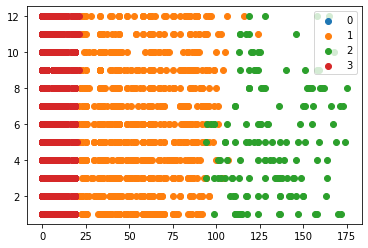

In [57]:
trainGmm(X_train, gm)

In [58]:
testGmm(X_test, gm)

(array([1884,  862, 2254]), array([0., 1., 2., 3.]))
-8.556134783358942


In [59]:
gm.predict_proba([X_test[5]])

array([[0.00000000e+00, 2.73750259e-02, 4.23377943e-06, 9.72620740e-01]])

In [60]:
labels[5]

3